In [6]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import save_model,load_model

In [8]:
sentences = [
    'cat chases mouse',
    'cat catches mouse',
    'cat eats mouse',
    'mouse runs into hole',
    'cat says bad words',
    'cat and mouse are pals',
    'cat and mouse are chums',
    'mouse stores food in hole',
    'cat stores food in house',
    'mouse sleeps in hole',
    'cat sleeps in house',
    'cat and mouse are buddies',
    'mouse lives in hole',
    'cat lives in house',
    'thomas hates cats',
    'thomas likes mouses',
    'messi plays football',
    'ronaldo plays football',
    'biden is president of usa',
    'putin is president of russia',
    'sisi is president of egypt',
    'shakira is my fovorite girl',
    'dog chases frisbee',
    'bird sings a song',
    'child plays with toys',
    'farmer grows crops',
    'baker makes bread',
    'dog barks at mailman',
    'bird builds a nest',
    'child reads a book',
    'farmer harvests vegetables',
    'baker sells bread',
    'car drives down the street',
    'computer displays information',
    'sun shines brightly',
    'flower blooms in spring',
    'rain falls from the sky',
    'feline chases rodent',
    'rodent flees from feline',
    'feline captures rodent',
    'rodent finds refuge' ,
    'feline and rodent become friends',
    
    ]



In [10]:
def get_vocab(data):
    i=1
    word2idx = dict()
    idx2word = dict()
    temp=set()
    for sentence in data:
        for word in sentence.split():
            if word not in temp:
                temp.add(word)
                word2idx[word]=i
                idx2word[i]=word
                i+=1
    return i, word2idx ,idx2word 

vocab_size,word2idx,idx2word=get_vocab(sentences)

    

In [12]:
def prev_words(i,doc,window_size,word2idx_input):
    out=[]
    for index in range (i-window_size,i):
        if index >= 0:
            out.append(word2idx_input[doc[index]])
        else:
            out.append(0)
    return out        

def next_words(i,doc,window_size,word2idx_input):
    out=[]
    for index in range(i+1,i+window_size+1,1):
        if index < len(doc):
            out.append(word2idx_input[doc[index]])
        else:
            out.append(0) # 0= <pad>
    return out

def get_training_data(word2idx_input,sentences,window_size=6):
    X= []
    y= []
    for sentence in sentences:
        xi=[]
        yi=[]
        sentence=sentence.split()
        for index,word in enumerate(sentence):
            prev=prev_words(index,sentence,window_size//2,word2idx_input)
            next_word=next_words(index,sentence,window_size//2,word2idx_input)
            assert len(prev)==len(next_word)
            xi.append(prev+next_word)
            yi.append([word2idx_input[word]])
        X.extend(xi)
        y.extend(yi)
    return X,y 
window_size=5
X,y = get_training_data(word2idx,sentences,window_size)


In [13]:
embed_size=2
model= tf.keras.models.Sequential([
    (tf.keras.layers.Embedding(vocab_size,embed_size)),
    (tf.keras.layers.GlobalAveragePooling1D()),
    (tf.keras.layers.Dense(vocab_size,activation='softmax'))
])


In [14]:
model.compile(optimizer="Adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
# loss= tf.keras.losses.categorical_crossentropy

In [15]:
X_tensor=tf.convert_to_tensor(X)
y_tensor=tf.convert_to_tensor(y)
X_tensor.shape , y_tensor.shape

(TensorShape([163, 4]), TensorShape([163, 1]))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(X_tensor,y_tensor,epochs=3000,batch_size=32)

Epoch 1/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0119 - loss: 4.5640
Epoch 2/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0555 - loss: 4.5616 
Epoch 3/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0666 - loss: 4.5599 
Epoch 4/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0802 - loss: 4.5582 
Epoch 5/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0782 - loss: 4.5572 
Epoch 6/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0741 - loss: 4.5545 
Epoch 7/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0570 - loss: 4.5542     
Epoch 8/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0398 - loss: 4.5523     
Epoch 9/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0744 - loss: 4.5484 
Epoch 10/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0540 - loss: 4.5482 
Epoch 11/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0797 - loss: 4.5453 
Epoch 12/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0670 - loss: 4.3558 
Epoch 70/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0655 - loss: 4.3435 
Epoch 71/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0416 - loss: 4.3794     
Epoch 72/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0622 - loss: 4.3258 
Epoch 73/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0726 - loss: 4.3229 
Epoch 74/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0741 - loss: 4.3069 
Epoch 75/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0480 - loss: 4.3484 
Epoch 76/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0763 - loss: 4.3093 
Epoch 77/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0521 - loss: 4.3243 
Epoch 78/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0603 - loss: 4.3175 
Epoch 79/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0529 - loss: 4.3244     
Epoch 80/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0723 - loss: 4.0606 
Epoch 137/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0673 - loss: 4.1362 
Epoch 138/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0827 - loss: 4.0821 
Epoch 139/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0681 - loss: 4.0761 
Epoch 140/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0976 - loss: 4.0359 
Epoch 141/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0725 - loss: 4.0454 
Epoch 142/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0759 - loss: 4.0115 
Epoch 143/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0781 - loss: 4.0763 
Epoch 144/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0954 - loss: 4.0613 
Epoch 145/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0775 - loss: 4.0549 
Epoch 146/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0690 - loss: 4.0687 
Epoch 147/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0939 - loss: 3.9287 
Epoch 204/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1171 - loss: 3.8793 
Epoch 205/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0933 - loss: 3.9074 
Epoch 206/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0709 - loss: 3.9852 
Epoch 207/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1085 - loss: 3.8787 
Epoch 208/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0924 - loss: 3.9052 
Epoch 209/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0912 - loss: 3.8813 
Epoch 210/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1022 - loss: 3.9153 
Epoch 211/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0750 - loss: 3.9392 
Epoch 212/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1081 - loss: 3.8763 
Epoch 213/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 3.9985 
Epoch 214/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1030 - loss: 3.7430 
Epoch 271/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1114 - loss: 3.7861 
Epoch 272/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1041 - loss: 3.7644 
Epoch 273/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1019 - loss: 3.7735 
Epoch 274/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0918 - loss: 3.7803 
Epoch 275/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0922 - loss: 3.7750 
Epoch 276/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1101 - loss: 3.7534 
Epoch 277/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1291 - loss: 3.7860 
Epoch 278/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1064 - loss: 3.7151 
Epoch 279/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1235 - loss: 3.7280  
Epoch 280/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0777 - loss: 3.8046 
Epoch 281/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1042 - loss: 3.6568 
Epoch 338/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1019 - loss: 3.6728 
Epoch 339/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1107 - loss: 3.6381 
Epoch 340/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1036 - loss: 3.6484 
Epoch 341/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1284 - loss: 3.6311 
Epoch 342/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1275 - loss: 3.6369 
Epoch 343/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0746 - loss: 3.7456     
Epoch 344/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1116 - loss: 3.6182 
Epoch 345/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1230 - loss: 3.6626 
Epoch 346/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1220 - loss: 3.6160 
Epoch 347/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1060 - loss: 3.6286 
Epoch 348/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1029 - loss: 3.5549 
Epoch 405/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1261 - loss: 3.5692 
Epoch 406/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1085 - loss: 3.5902 
Epoch 407/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1135 - loss: 3.5134 
Epoch 408/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1185 - loss: 3.5004 
Epoch 409/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1198 - loss: 3.5513 
Epoch 410/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1176 - loss: 3.5781 
Epoch 411/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1284 - loss: 3.4761 
Epoch 412/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1150 - loss: 3.5256 
Epoch 413/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1094 - loss: 3.5200 
Epoch 414/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0993 - loss: 3.5493 
Epoch 415/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1318 - loss: 3.4155 
Epoch 472/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1075 - loss: 3.4634 
Epoch 473/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1154 - loss: 3.4581 
Epoch 474/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1273 - loss: 3.4691 
Epoch 475/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1199 - loss: 3.4673 
Epoch 476/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1247 - loss: 3.4441 
Epoch 477/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1355 - loss: 3.5115 
Epoch 478/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1273 - loss: 3.4521 
Epoch 479/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1179 - loss: 3.4301 
Epoch 480/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1186 - loss: 3.4387 
Epoch 481/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1362 - loss: 3.3708 
Epoch 482/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1406 - loss: 3.3833 
Epoch 539/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1459 - loss: 3.3011 
Epoch 540/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1455 - loss: 3.3410 
Epoch 541/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1022 - loss: 3.4134 
Epoch 542/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1322 - loss: 3.3190 
Epoch 543/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1429 - loss: 3.3121 
Epoch 544/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1143 - loss: 3.4144 
Epoch 545/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1191 - loss: 3.3345 
Epoch 546/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1076 - loss: 3.3440 
Epoch 547/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1288 - loss: 3.2942 
Epoch 548/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1098 - loss: 3.4204 
Epoch 549/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1072 - loss: 3.2995 
Epoch 606/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1370 - loss: 3.2826 
Epoch 607/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1138 - loss: 3.2891 
Epoch 608/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1445 - loss: 3.2797 
Epoch 609/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1281 - loss: 3.2798 
Epoch 610/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1395 - loss: 3.2234 
Epoch 611/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1228 - loss: 3.2751 
Epoch 612/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1397 - loss: 3.2883 
Epoch 613/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1490 - loss: 3.2812 
Epoch 614/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1101 - loss: 3.3325 
Epoch 615/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1280 - loss: 3.3123 
Epoch 616/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1375 - loss: 3.1949 
Epoch 673/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1427 - loss: 3.1658 
Epoch 674/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2055 - loss: 3.1631 
Epoch 675/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1747 - loss: 3.1595 
Epoch 676/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1424 - loss: 3.1899 
Epoch 677/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1327 - loss: 3.1918 
Epoch 678/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1351 - loss: 3.1989 
Epoch 679/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1294 - loss: 3.1861 
Epoch 680/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1653 - loss: 3.1563 
Epoch 681/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1524 - loss: 3.1519 
Epoch 682/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1541 - loss: 3.1410 
Epoch 683/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1942 - loss: 3.2076 
Epoch 740/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1830 - loss: 3.1849 
Epoch 741/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2358 - loss: 3.1248 
Epoch 742/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2127 - loss: 3.1583 
Epoch 743/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2344 - loss: 3.1126 
Epoch 744/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2573 - loss: 3.0953 
Epoch 745/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2179 - loss: 3.1713 
Epoch 746/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2545 - loss: 3.0922 
Epoch 747/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2310 - loss: 3.1244 
Epoch 748/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2006 - loss: 3.1526 
Epoch 749/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2481 - loss: 3.1305 
Epoch 750/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2319 - loss: 3.0723 
Epoch 807/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2733 - loss: 3.0157 
Epoch 808/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2379 - loss: 3.0588 
Epoch 809/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2764 - loss: 3.0080 
Epoch 810/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2629 - loss: 3.0274 
Epoch 811/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 2.9817 
Epoch 812/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2251 - loss: 3.1157 
Epoch 813/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2654 - loss: 3.0192 
Epoch 814/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2061 - loss: 3.1050 
Epoch 815/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2056 - loss: 3.0964 
Epoch 816/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2160 - loss: 3.0632 
Epoch 817/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 2.9943 
Epoch 874/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2195 - loss: 3.0034 
Epoch 875/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2002 - loss: 3.0469 
Epoch 876/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1955 - loss: 3.0116 
Epoch 877/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2275 - loss: 3.0213 
Epoch 878/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1704 - loss: 3.0491 
Epoch 879/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2447 - loss: 2.9454 
Epoch 880/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2195 - loss: 2.9922 
Epoch 881/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2428 - loss: 2.9383 
Epoch 882/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 2.9819 
Epoch 883/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2531 - loss: 2.9566 
Epoch 884/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 2.9734 
Epoch 941/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2088 - loss: 3.0066 
Epoch 942/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2295 - loss: 2.9272 
Epoch 943/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2163 - loss: 3.0015 
Epoch 944/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2366 - loss: 2.9779 
Epoch 945/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2491 - loss: 2.9610 
Epoch 946/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2487 - loss: 2.9425 
Epoch 947/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2329 - loss: 2.9489 
Epoch 948/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2342 - loss: 2.9609 
Epoch 949/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2206 - loss: 2.9894 
Epoch 950/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2023 - loss: 3.0465 
Epoch 951/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 2.9087 
Epoch 1008/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2302 - loss: 2.9370 
Epoch 1009/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2428 - loss: 2.9092 
Epoch 1010/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2560 - loss: 2.8689 
Epoch 1011/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2710 - loss: 2.8851 
Epoch 1012/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 2.9391 
Epoch 1013/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2527 - loss: 2.8865 
Epoch 1014/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2508 - loss: 2.9022 
Epoch 1015/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2417 - loss: 2.9353 
Epoch 1016/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 2.9179 
Epoch 1017/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 2.9413 
Epoch 1018/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 2.9189 
Epoch 1075/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2693 - loss: 2.8576 
Epoch 1076/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2423 - loss: 2.8862 
Epoch 1077/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2620 - loss: 2.8152 
Epoch 1078/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2436 - loss: 2.8740 
Epoch 1079/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 2.7960 
Epoch 1080/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2355 - loss: 2.8190 
Epoch 1081/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2464 - loss: 2.8855 
Epoch 1082/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2336 - loss: 2.8622 
Epoch 1083/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2836 - loss: 2.8056 
Epoch 1084/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2508 - loss: 2.8572 
Epoch 1085/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2644 - loss: 2.8973 
Epoch 1142/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3140 - loss: 2.7606 
Epoch 1143/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2779 - loss: 2.8374 
Epoch 1144/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2625 - loss: 2.8450 
Epoch 1145/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2873 - loss: 2.7629 
Epoch 1146/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2625 - loss: 2.8685 
Epoch 1147/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2822 - loss: 2.8109 
Epoch 1148/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2932 - loss: 2.8138 
Epoch 1149/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2474 - loss: 2.8625 
Epoch 1150/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2733 - loss: 2.7923 
Epoch 1151/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2696 - loss: 2.7891 
Epoch 1152/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2576 - loss: 2.7655 
Epoch 1209/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2727 - loss: 2.7821 
Epoch 1210/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2509 - loss: 2.8411 
Epoch 1211/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2822 - loss: 2.7702 
Epoch 1212/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2808 - loss: 2.7267 
Epoch 1213/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2669 - loss: 2.7768 
Epoch 1214/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2539 - loss: 2.8057 
Epoch 1215/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 2.7647 
Epoch 1216/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2921 - loss: 2.7774 
Epoch 1217/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2658 - loss: 2.8027 
Epoch 1218/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2504 - loss: 2.7872 
Epoch 1219/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 2.7616 
Epoch 1276/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2654 - loss: 2.7360 
Epoch 1277/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2648 - loss: 2.7578 
Epoch 1278/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 2.6668 
Epoch 1279/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3065 - loss: 2.7084 
Epoch 1280/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2682 - loss: 2.7945 
Epoch 1281/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2762 - loss: 2.7161 
Epoch 1282/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2712 - loss: 2.7196 
Epoch 1283/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2881 - loss: 2.7296 
Epoch 1284/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2714 - loss: 2.7460 
Epoch 1285/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2846 - loss: 2.6850 
Epoch 1286/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2573 - loss: 2.7589 
Epoch 1343/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2784 - loss: 2.6788 
Epoch 1344/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3031 - loss: 2.6749 
Epoch 1345/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2857 - loss: 2.7003 
Epoch 1346/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2681 - loss: 2.7090 
Epoch 1347/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2720 - loss: 2.6603 
Epoch 1348/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2466 - loss: 2.7144 
Epoch 1349/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2652 - loss: 2.6649 
Epoch 1350/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2954 - loss: 2.6519 
Epoch 1351/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2392 - loss: 2.7471 
Epoch 1352/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2814 - loss: 2.6722 
Epoch 1353/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2659 - loss: 2.6544 
Epoch 1410/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2589 - loss: 2.6115 
Epoch 1411/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2558 - loss: 2.6852 
Epoch 1412/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2950 - loss: 2.6482 
Epoch 1413/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2603 - loss: 2.6942 
Epoch 1414/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2774 - loss: 2.6710 
Epoch 1415/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2618 - loss: 2.7023 
Epoch 1416/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2356 - loss: 2.7353 
Epoch 1417/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2835 - loss: 2.6587 
Epoch 1418/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2306 - loss: 2.6951 
Epoch 1419/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2686 - loss: 2.6489 
Epoch 1420/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2841 - loss: 2.5848 
Epoch 1477/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2589 - loss: 2.6848 
Epoch 1478/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2626 - loss: 2.6903 
Epoch 1479/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2905 - loss: 2.6366 
Epoch 1480/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2485 - loss: 2.6808 
Epoch 1481/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2861 - loss: 2.6572 
Epoch 1482/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2550 - loss: 2.7334 
Epoch 1483/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2959 - loss: 2.5997 
Epoch 1484/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 2.6707 
Epoch 1485/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2946 - loss: 2.6234 
Epoch 1486/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2928 - loss: 2.6739 
Epoch 1487/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2809 - loss: 2.6274 
Epoch 1544/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2667 - loss: 2.5621 
Epoch 1545/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2761 - loss: 2.6556 
Epoch 1546/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2650 - loss: 2.6295 
Epoch 1547/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3049 - loss: 2.6448 
Epoch 1548/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3103 - loss: 2.5964 
Epoch 1549/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2758 - loss: 2.5710 
Epoch 1550/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3074 - loss: 2.5682 
Epoch 1551/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2899 - loss: 2.5641 
Epoch 1552/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2938 - loss: 2.5604 
Epoch 1553/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3072 - loss: 2.5402 
Epoch 1554/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3083 - loss: 2.5850 
Epoch 1611/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3017 - loss: 2.5624 
Epoch 1612/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3219 - loss: 2.5392 
Epoch 1613/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3450 - loss: 2.5225 
Epoch 1614/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 2.5218 
Epoch 1615/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3329 - loss: 2.5376 
Epoch 1616/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2822 - loss: 2.6113 
Epoch 1617/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3315 - loss: 2.5222 
Epoch 1618/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3354 - loss: 2.5047 
Epoch 1619/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2991 - loss: 2.5811 
Epoch 1620/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2913 - loss: 2.5966 
Epoch 1621/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2941 - loss: 2.5605 
Epoch 1678/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2772 - loss: 2.6118 
Epoch 1679/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3157 - loss: 2.4789 
Epoch 1680/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3104 - loss: 2.5541 
Epoch 1681/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2921 - loss: 2.5449 
Epoch 1682/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3295 - loss: 2.5172 
Epoch 1683/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3269 - loss: 2.5257 
Epoch 1684/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2835 - loss: 2.5576 
Epoch 1685/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2978 - loss: 2.5491 
Epoch 1686/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3094 - loss: 2.5009 
Epoch 1687/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3068 - loss: 2.4673 
Epoch 1688/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3314 - loss: 2.4776 
Epoch 1745/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3071 - loss: 2.5395 
Epoch 1746/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2896 - loss: 2.5650 
Epoch 1747/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3039 - loss: 2.5205 
Epoch 1748/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2949 - loss: 2.5147 
Epoch 1749/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3022 - loss: 2.5568 
Epoch 1750/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3482 - loss: 2.4687 
Epoch 1751/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3340 - loss: 2.4562 
Epoch 1752/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3207 - loss: 2.5138 
Epoch 1753/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 2.4930 
Epoch 1754/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3092 - loss: 2.5705 
Epoch 1755/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3236 - loss: 2.5051 
Epoch 1812/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3186 - loss: 2.4295 
Epoch 1813/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3216 - loss: 2.5209 
Epoch 1814/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3252 - loss: 2.4531 
Epoch 1815/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2888 - loss: 2.5130 
Epoch 1816/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3569 - loss: 2.4110 
Epoch 1817/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3074 - loss: 2.5404 
Epoch 1818/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3315 - loss: 2.4540 
Epoch 1819/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3082 - loss: 2.5373 
Epoch 1820/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3019 - loss: 2.5067 
Epoch 1821/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3255 - loss: 2.4756 
Epoch 1822/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3230 - loss: 2.4731 
Epoch 1879/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3370 - loss: 2.5006 
Epoch 1880/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3331 - loss: 2.4736 
Epoch 1881/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3163 - loss: 2.4809 
Epoch 1882/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3212 - loss: 2.4529 
Epoch 1883/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3399 - loss: 2.4126 
Epoch 1884/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3922 - loss: 2.3737 
Epoch 1885/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3661 - loss: 2.4538 
Epoch 1886/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3277 - loss: 2.4666 
Epoch 1887/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3477 - loss: 2.4715 
Epoch 1888/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 2.4493 
Epoch 1889/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3565 - loss: 2.4072 
Epoch 1946/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3684 - loss: 2.3952 
Epoch 1947/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 2.4445 
Epoch 1948/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - loss: 2.3990 
Epoch 1949/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3487 - loss: 2.3924 
Epoch 1950/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 2.4544 
Epoch 1951/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3261 - loss: 2.4537 
Epoch 1952/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3124 - loss: 2.4113 
Epoch 1953/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3802 - loss: 2.4017 
Epoch 1954/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3222 - loss: 2.4367 
Epoch 1955/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3354 - loss: 2.3706 
Epoch 1956/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3335 - loss: 2.3759 
Epoch 2013/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3183 - loss: 2.3562 
Epoch 2014/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3068 - loss: 2.4145 
Epoch 2015/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3285 - loss: 2.4205 
Epoch 2016/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3053 - loss: 2.4234 
Epoch 2017/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3086 - loss: 2.4336 
Epoch 2018/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3195 - loss: 2.4282 
Epoch 2019/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 2.3649 
Epoch 2020/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3159 - loss: 2.4137 
Epoch 2021/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3339 - loss: 2.4091 
Epoch 2022/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 2.3703 
Epoch 2023/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3404 - loss: 2.3481 
Epoch 2080/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3177 - loss: 2.3867 
Epoch 2081/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3090 - loss: 2.3976 
Epoch 2082/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3286 - loss: 2.3353 
Epoch 2083/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2856 - loss: 2.4265 
Epoch 2084/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3139 - loss: 2.4152 
Epoch 2085/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3423 - loss: 2.3821 
Epoch 2086/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3473 - loss: 2.3804 
Epoch 2087/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3437 - loss: 2.3595 
Epoch 2088/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 2.3743 
Epoch 2089/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3119 - loss: 2.4200 
Epoch 2090/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2985 - loss: 2.3688 
Epoch 2147/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2995 - loss: 2.3583 
Epoch 2148/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3439 - loss: 2.2895 
Epoch 2149/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 2.4259 
Epoch 2150/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3247 - loss: 2.3323 
Epoch 2151/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3342 - loss: 2.3364 
Epoch 2152/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2808 - loss: 2.4382 
Epoch 2153/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3385 - loss: 2.3318 
Epoch 2154/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3231 - loss: 2.3800 
Epoch 2155/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 2.3660 
Epoch 2156/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2981 - loss: 2.4097 
Epoch 2157/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3008 - loss: 2.3339 
Epoch 2214/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3155 - loss: 2.3469 
Epoch 2215/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3256 - loss: 2.3318 
Epoch 2216/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3218 - loss: 2.3215 
Epoch 2217/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3594 - loss: 2.3027 
Epoch 2218/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3235 - loss: 2.2951 
Epoch 2219/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3340 - loss: 2.3366 
Epoch 2220/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss: 2.3156 
Epoch 2221/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3233 - loss: 2.3373 
Epoch 2222/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3253 - loss: 2.3804 
Epoch 2223/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3425 - loss: 2.3021 
Epoch 2224/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3344 - loss: 2.3274 
Epoch 2281/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3043 - loss: 2.3563 
Epoch 2282/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3420 - loss: 2.3089 
Epoch 2283/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3403 - loss: 2.2805 
Epoch 2284/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3316 - loss: 2.3030 
Epoch 2285/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3430 - loss: 2.3159 
Epoch 2286/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 2.3218 
Epoch 2287/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3091 - loss: 2.2770 
Epoch 2288/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2944 - loss: 2.3587 
Epoch 2289/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3105 - loss: 2.3216 
Epoch 2290/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2868 - loss: 2.3128 
Epoch 2291/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3130 - loss: 2.3774 
Epoch 2348/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3579 - loss: 2.2786 
Epoch 2349/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3222 - loss: 2.2918 
Epoch 2350/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3456 - loss: 2.2851 
Epoch 2351/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3083 - loss: 2.3155 
Epoch 2352/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2954 - loss: 2.2967 
Epoch 2353/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3119 - loss: 2.3142 
Epoch 2354/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3544 - loss: 2.3037 
Epoch 2355/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3129 - loss: 2.3477 
Epoch 2356/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3321 - loss: 2.3092 
Epoch 2357/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3076 - loss: 2.3545 
Epoch 2358/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3425 - loss: 2.2449 
Epoch 2415/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3385 - loss: 2.2695 
Epoch 2416/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 2.2104 
Epoch 2417/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3215 - loss: 2.2859 
Epoch 2418/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3077 - loss: 2.2887 
Epoch 2419/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3365 - loss: 2.2385 
Epoch 2420/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3499 - loss: 2.2435 
Epoch 2421/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3256 - loss: 2.2850 
Epoch 2422/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3335 - loss: 2.2470 
Epoch 2423/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3569 - loss: 2.2429 
Epoch 2424/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3385 - loss: 2.2938 
Epoch 2425/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3698 - loss: 2.2301 
Epoch 2482/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 2.2753 
Epoch 2483/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 2.2458 
Epoch 2484/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3825 - loss: 2.2013 
Epoch 2485/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3268 - loss: 2.2827 
Epoch 2486/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3659 - loss: 2.2499 
Epoch 2487/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3405 - loss: 2.2569 
Epoch 2488/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3705 - loss: 2.1751 
Epoch 2489/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3652 - loss: 2.2245 
Epoch 2490/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3493 - loss: 2.2520 
Epoch 2491/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3268 - loss: 2.3044 
Epoch 2492/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3258 - loss: 2.2292 
Epoch 2549/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3651 - loss: 2.1903 
Epoch 2550/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3124 - loss: 2.3152 
Epoch 2551/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 2.3124 
Epoch 2552/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3668 - loss: 2.1737 
Epoch 2553/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3477 - loss: 2.2835 
Epoch 2554/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3430 - loss: 2.2524 
Epoch 2555/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3700 - loss: 2.2330 
Epoch 2556/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3517 - loss: 2.2197 
Epoch 2557/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3593 - loss: 2.1961 
Epoch 2558/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3548 - loss: 2.2165 
Epoch 2559/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 2.2214 
Epoch 2616/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3577 - loss: 2.1761 
Epoch 2617/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3361 - loss: 2.2219 
Epoch 2618/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3194 - loss: 2.2346 
Epoch 2619/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3476 - loss: 2.2058 
Epoch 2620/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 2.2019 
Epoch 2621/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 2.1772 
Epoch 2622/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3505 - loss: 2.2171 
Epoch 2623/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3403 - loss: 2.2184 
Epoch 2624/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3536 - loss: 2.2245 
Epoch 2625/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3642 - loss: 2.1738 
Epoch 2626/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3523 - loss: 2.2077 
Epoch 2683/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3272 - loss: 2.2025 
Epoch 2684/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 2.1900 
Epoch 2685/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3133 - loss: 2.2175 
Epoch 2686/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 2.1962 
Epoch 2687/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3672 - loss: 2.1707 
Epoch 2688/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 2.2118 
Epoch 2689/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3616 - loss: 2.1740 
Epoch 2690/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3578 - loss: 2.1910 
Epoch 2691/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3676 - loss: 2.1104  
Epoch 2692/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3347 - loss: 2.2629 
Epoch 2693/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3727 - loss: 2.1743 
Epoch 2750/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3755 - loss: 2.2077 
Epoch 2751/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3652 - loss: 2.1958 
Epoch 2752/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3572 - loss: 2.2447 
Epoch 2753/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3458 - loss: 2.1976 
Epoch 2754/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 2.2044 
Epoch 2755/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3741 - loss: 2.1360 
Epoch 2756/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3827 - loss: 2.1472 
Epoch 2757/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.3829 - loss: 2.1204
Epoch 2758/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3342 - loss: 2.2401 
Epoch 2759/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 2.1672 
Epoch 2760/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.2936 - loss: 2.2097  
Epoch 2817/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 2.1765 
Epoch 2818/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3329 - loss: 2.1748 
Epoch 2819/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3173 - loss: 2.1646 
Epoch 2820/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3112 - loss: 2.1862 
Epoch 2821/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3293 - loss: 2.1317 
Epoch 2822/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3318 - loss: 2.2012 
Epoch 2823/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3684 - loss: 2.1737 
Epoch 2824/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3402 - loss: 2.1820 
Epoch 2825/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3272 - loss: 2.1787  
Epoch 2826/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3426 - loss: 2.1660 
Epoch 2827/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/s

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3802 - loss: 2.1084 
Epoch 2884/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3945 - loss: 2.1505 
Epoch 2885/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3371 - loss: 2.1754 
Epoch 2886/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3720 - loss: 2.1581 
Epoch 2887/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3672 - loss: 2.1626 
Epoch 2888/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3876 - loss: 2.1071  
Epoch 2889/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4031 - loss: 2.1305 
Epoch 2890/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4099 - loss: 2.0876 
Epoch 2891/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3875 - loss: 2.0763 
Epoch 2892/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 2.1806 
Epoch 2893/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3663 - loss: 2.1662  
Epoch 2894/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3776 - loss: 2.0971 
Epoch 2951/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3468 - loss: 2.0697 
Epoch 2952/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3250 - loss: 2.1696 
Epoch 2953/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4016 - loss: 2.1232 
Epoch 2954/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3713 - loss: 2.1016 
Epoch 2955/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3421 - loss: 2.1099 
Epoch 2956/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4359 - loss: 2.0057 
Epoch 2957/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3522 - loss: 2.1098 
Epoch 2958/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3511 - loss: 2.1169 
Epoch 2959/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4361 - loss: 2.0207 
Epoch 2960/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3997 - loss: 2.0575 
Epoch 2961/3000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [302]:
# save_model(model, "path/to/save/directory/my_model")

# input_test= ["sisi is president of egypt"]
# vocab_size_test,word2idx_test,idx2word_test=get_vocab(input_test)
# vocab_size_test,word2idx_test,idx2word_test
# X_test,y_test = get_training_data(word2idx_test,input_test,window_size)
# X_test_tensor=tf.convert_to_tensor(X_test)
# y_test_tensor=tf.convert_to_tensor(y_test)

# X_test_tensor.shape

In [303]:
# predicted=model.predict(X_test_tensor)
# (predicted[0])

In [19]:
print( model.get_layer('embedding')(tf.convert_to_tensor([word2idx['thomas']]))   )

tf.Tensor([[-8.727502 -9.151279]], shape=(1, 2), dtype=float32)


In [450]:
def get_embedding(word):
    vec = model.get_layer('')(tf.convert_to_tensor([word2idx[word]]))
    return vec.numpy().tolist()

In [451]:
embedding = get_embedding("cat")
print(tf.convert_to_tensor(embedding))


tf.Tensor([[  3.8494792 -35.088776 ]], shape=(1, 2), dtype=float32)


In [452]:
word2vec=[]
for word,word_index in word2idx.items():
    vec = model.get_layer('embedding_12')(tf.convert_to_tensor([word2idx[word]])).numpy().tolist()[0]
    word2vec.append((word,vec))
# word2vec  

In [453]:
def get_word2vec():
    word2vec=[]
    for word,word_index in word2idx.items():
        vec = model.get_layer('embedding_12')(tf.convert_to_tensor(word2idx[word])).numpy().tolist()
        word2vec.append((word,vec))  
    return word2vec
        

In [454]:
word2vec =get_word2vec()
# (word2vec)


In [392]:
# word2vec[4]
# word2vec[-1]

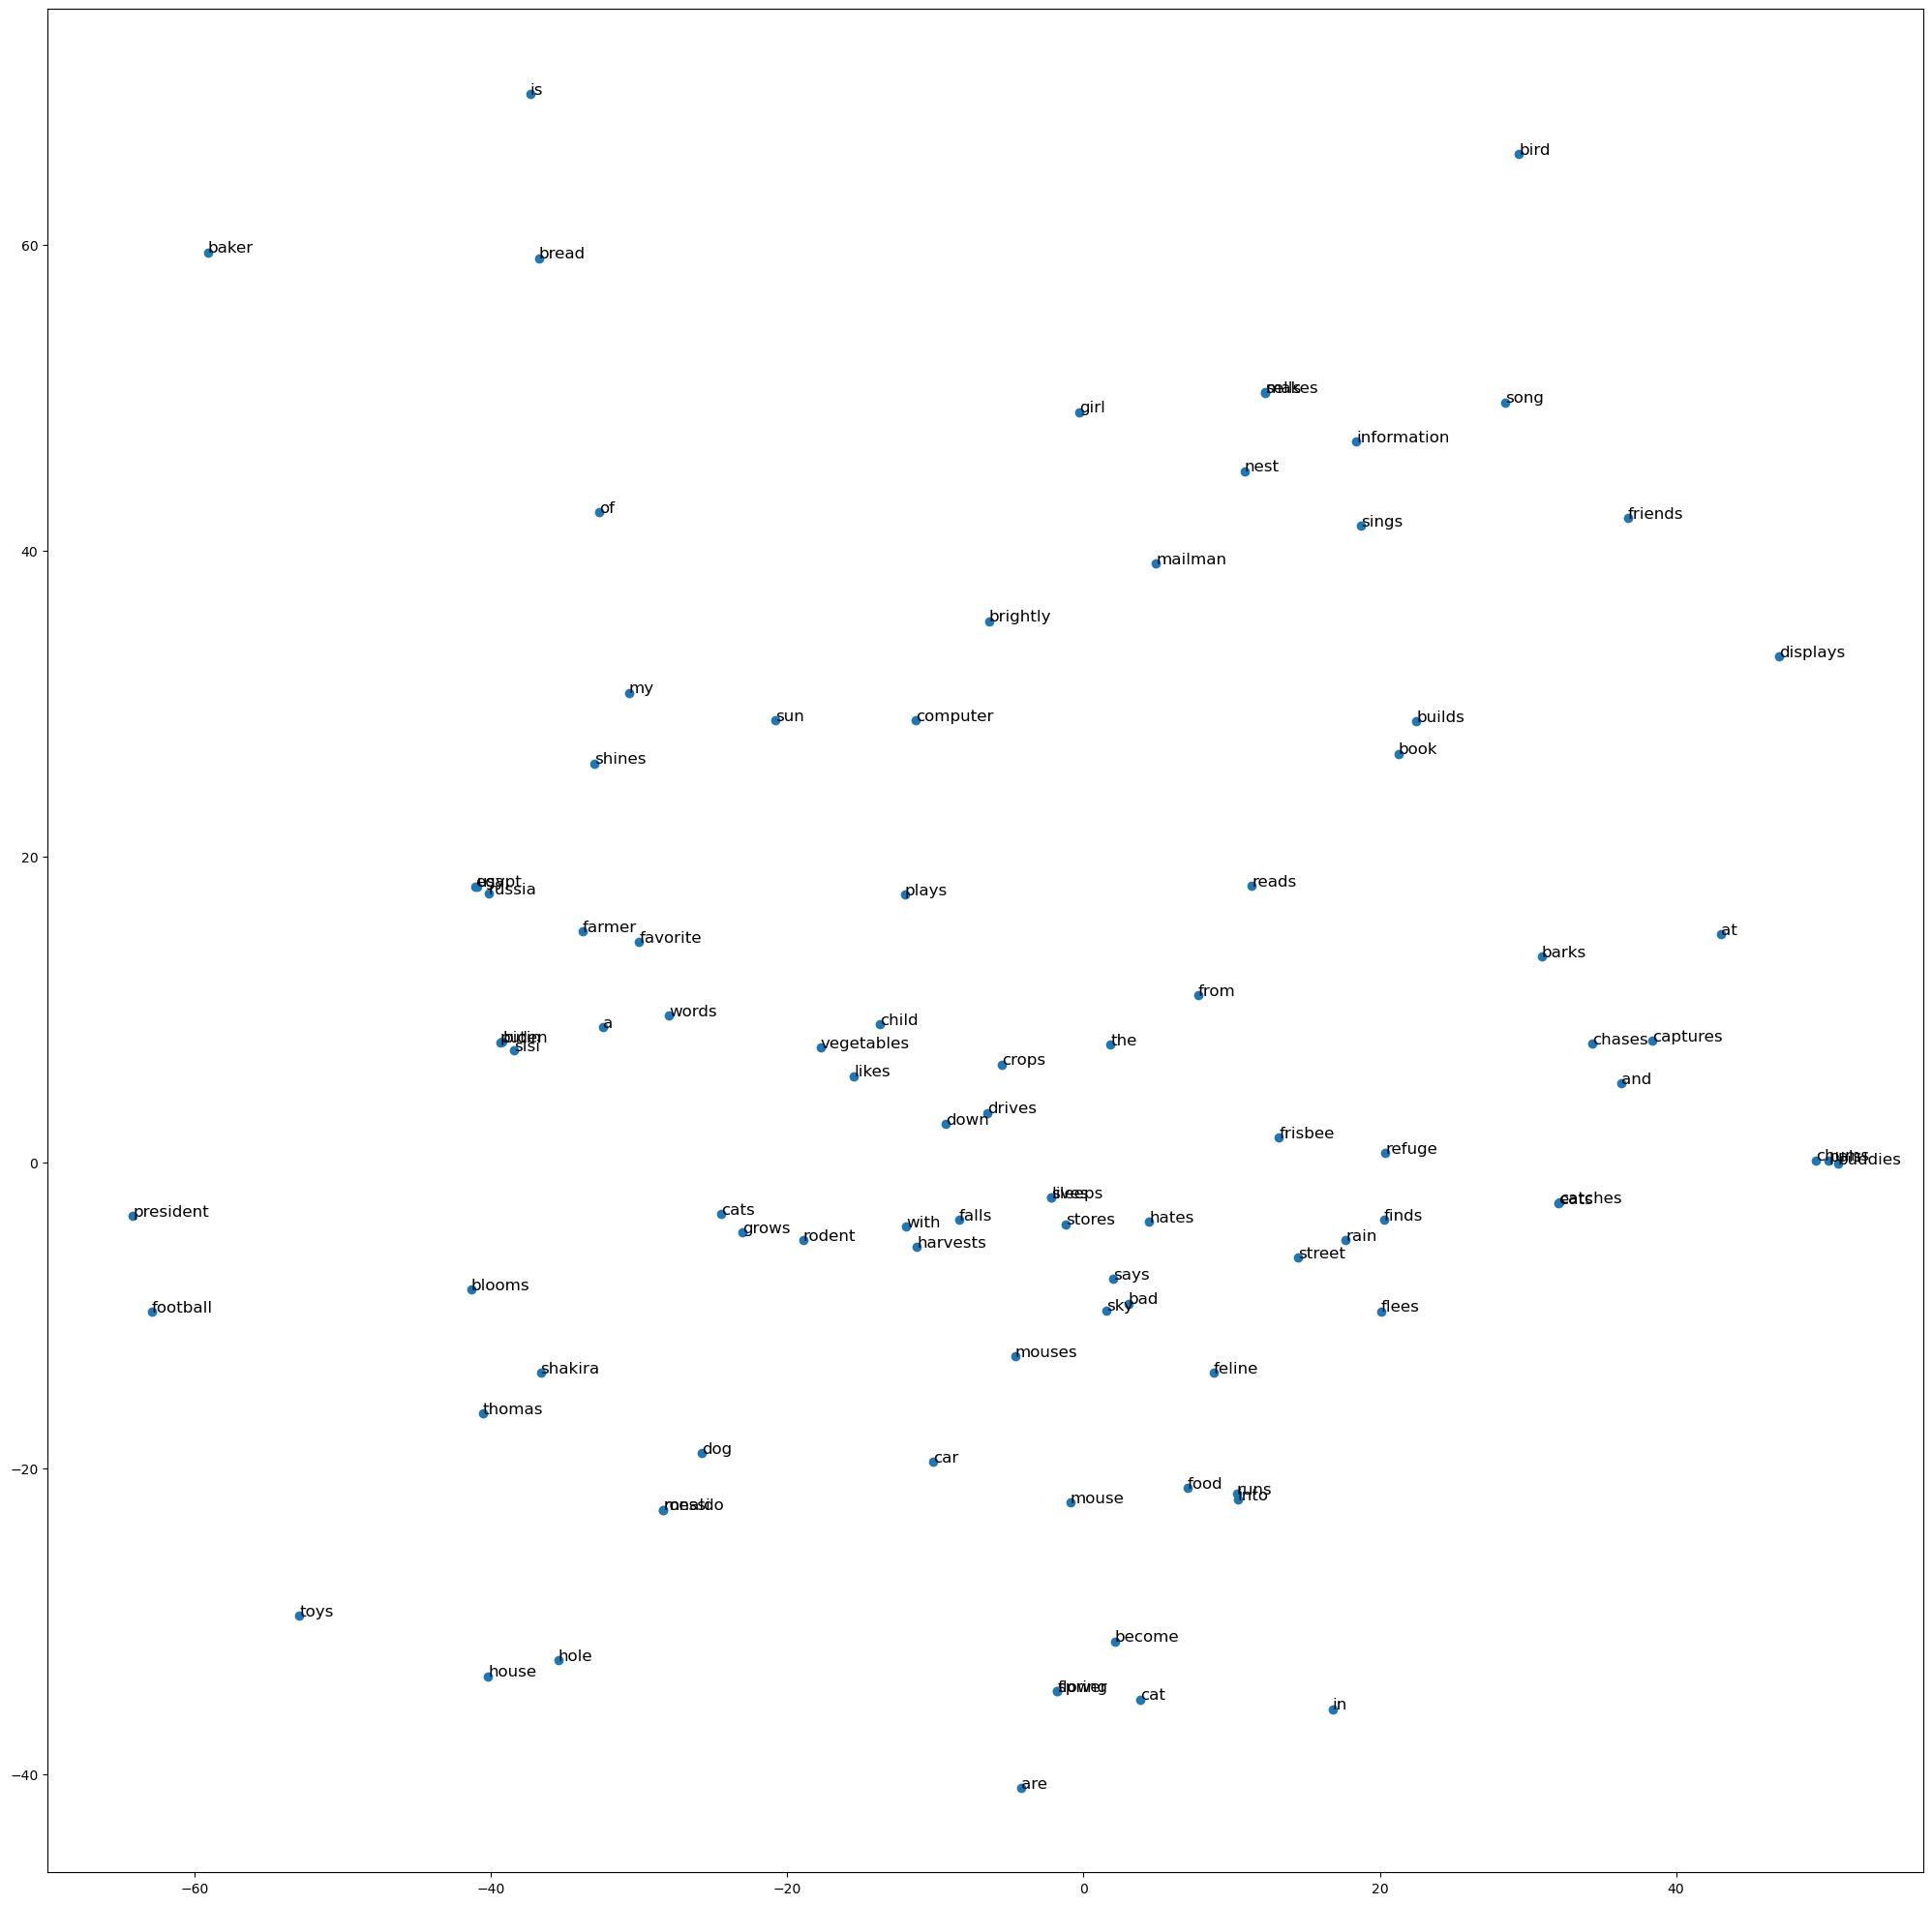

In [455]:
plt.figure(figsize=(25,25))
plt.scatter([i[1][0] for i in word2vec],[i[1][1] for i in word2vec])
for item in word2vec:
    word=item[0]
    plt.text(item[1][0], item[1][1],word,fontdict={'fontsize':12})
    
plt.show()    

In [456]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class SiameseLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1):
        super(SiameseLSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        
        # Shared LSTM layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        
        # Linear layer for projecting LSTM output to fixed-size vector
        self.linear = nn.Linear(hidden_dim, 128)  # Output size can be adjusted
        
        # Cosine similarity layer
        self.cosine_sim = nn.CosineSimilarity(dim=1)
        
    def forward_one(self, x):
        # LSTM layer
        out, _ = self.lstm(x)
        
        # Get the final hidden state (last time step)
        out = out[:, -1, :]
        
        # Project to a fixed-size vector
        out = self.linear(out)
        
        # Normalize the output vector
        out = torch.nn.functional.normalize(out, p=2, dim=1)
        
        return out
    
    def forward(self, x1, x2):
        # Forward pass for sentence pairs
        out1 = self.forward_one(x1)
        out2 = self.forward_one(x2)
        
        # Compute cosine similarity
        similarity = self.cosine_sim(out1, out2)
        
        return similarity


In [483]:
def get_sentence_embedding(sentence,word2idx):
    words=[]
    for i in (sentence.split()):
        words.append((model.get_layer('embedding_12')(tf.convert_to_tensor([word2idx[i]])).numpy().tolist()[0]))
    
#     return (np.mean(words,axis=1))
    return (((words)))

sen1=get_sentence_embedding('messi plays football',word2idx)
sen2=get_sentence_embedding('mouse sleeps in hole',word2idx)

In [484]:

sen1_flat=torch.reshape(torch.tensor(sen1),(1,-1,2))
sen2_flat=torch.reshape(torch.tensor(sen2),(1,-1,2))
print(f"sentence1 {sen1_flat} \n\n\n\n sentence2 {sen2_flat} ")

sentence1 tensor([[[-28.3491, -22.6875],
         [-12.0533,  17.5140],
         [-62.8879,  -9.7306]]]) 



 sentence2 tensor([[[ -0.8916, -22.2164],
         [ -2.1730,  -2.2984],
         [ 16.8187, -35.7214],
         [-35.4366, -32.5151]]]) 


In [485]:
input_dim = 2 # Assuming word embeddings of size 300
hidden_dim = 4
num_layers = 1

# test1="cat likes me"
# test2="cat likes mouse"

model_siamese = SiameseLSTM(input_dim, hidden_dim, num_layers)


In [486]:
sen1_flat.shape, sen2_flat.shape

(torch.Size([1, 3, 2]), torch.Size([1, 4, 2]))

In [487]:

similarity=model_siamese(sen1_flat,sen2_flat)
print(f"the two sentences are similar to each othrt like= {similarity.item() *100:.3f} %")

the two sentences are similar to each othrt like= 27.165 %


In [373]:
# from sentence_transformers.util import cos_sim
# sen1
# cos_sim(sen1,sen2)

In [420]:
sentences 


['cat chases mouse',
 'cat catches mouse',
 'cat eats mouse',
 'mouse runs into hole',
 'cat says bad words',
 'cat and mouse are pals',
 'cat and mouse are chums',
 'mouse stores food in hole',
 'cat stores food in house',
 'mouse sleeps in hole',
 'cat sleeps in house',
 'cat and mouse are buddies',
 'mouse lives in hole',
 'cat lives in house',
 'thomas hates cats',
 'thomas likes mouses',
 'messi plays football',
 'ronaldo plays football',
 'biden is president of usa',
 'putin is president of russia']